In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

In [4]:
# Loading the dataset
df = pd.read_csv("climate_change_data.csv")
df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [5]:
# Getting the first five rows of the dataset
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [6]:
# Getting the number of rows and columns of the dataset
df.shape

(10000, 9)

In [7]:
# Checking the number of missing values 
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [8]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [9]:
# Identify categorical columns
categorical_col = df.select_dtypes(include=["object"]).columns
categorical_col

Index(['Date', 'Location', 'Country'], dtype='object')

In [10]:
# Get statistics summary of the dataset
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [11]:
# Convert to datetime and extract the year, which will be a new column in the dataset
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000
...,...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,2022
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,2022
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,2022
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,2022


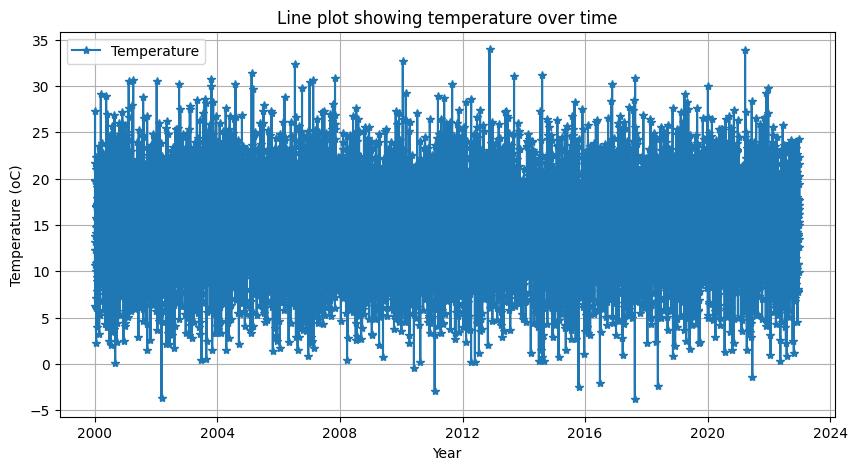

In [12]:
# Visualization of Temperature over Time

plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Temperature"], marker="*", linestyle="-", label="Temperature")
plt.title("Line plot showing temperature over time")
plt.xlabel("Year")
plt.ylabel("Temperature (oC)")
plt.legend()
plt.grid(True)

# Save the figure as a JPEG
plt.savefig("temperature_trend.jpg", format="jpeg", dpi=300)
plt.show()

In [13]:
# Identify numerical columns
numeric_col = df.select_dtypes(include=["number"])
numeric_col


,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
0,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000
1,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000
2,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000
3,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000
4,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000
...,...,...,...,...,...,...,...
9995,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,2022
9996,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,2022
9997,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,2022
9998,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,2022


In [14]:
# Compute the correlation matrix
correlation_matrix = numeric_col.corr()
correlation_matrix


,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
Temperature,1.000000,-0.002775,0.011663,0.004916,-0.015737,0.021779,-0.008387
CO2 Emissions,-0.002775,1.000000,-0.004751,-0.007443,-0.003661,-0.003990,-0.007292
Sea Level Rise,0.011663,-0.004751,1.000000,-0.000249,-0.007610,0.011789,-0.002536
Precipitation,0.004916,-0.007443,-0.000249,1.000000,0.003732,-0.018798,-0.005097
Humidity,-0.015737,-0.003661,-0.007610,0.003732,1.000000,0.028591,0.005428
Wind Speed,0.021779,-0.003990,0.011789,-0.018798,0.028591,1.000000,-0.007084
Year,-0.008387,-0.007292,-0.002536,-0.005097,0.005428,-0.007084,1.000000


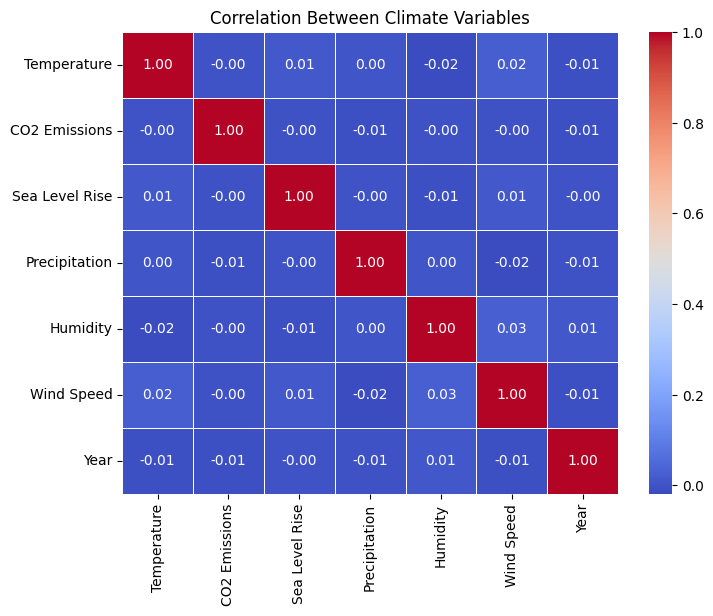

In [15]:
# Visualization of heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Climate Variables")

# Save the figure as a JPEG
plt.savefig("correlation.jpg", format="jpeg", dpi=300)
plt.show()

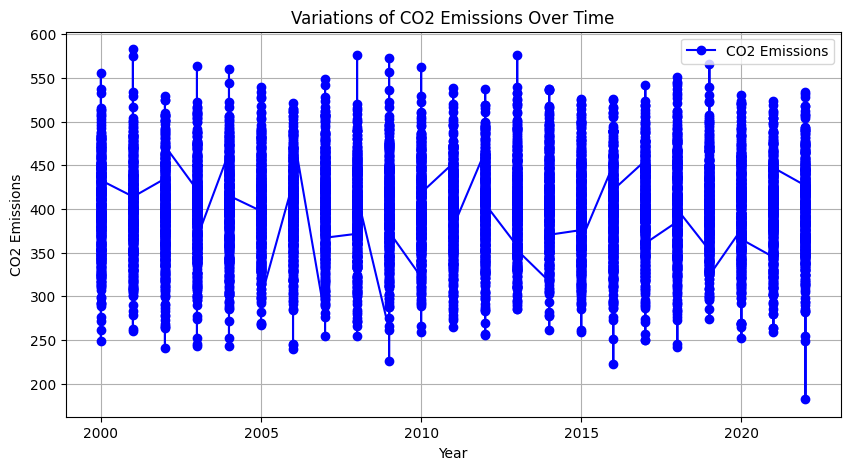

In [16]:
# Visualization of CO2 Emissions over Time
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["CO2 Emissions"], marker="o", linestyle="-", color="b", label="CO2 Emissions")
plt.title("Variations of CO2 Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.grid(True)

# Save the figure as a JPEG
plt.savefig("CO2_emission.jpg", format="jpeg", dpi=300)
plt.show()


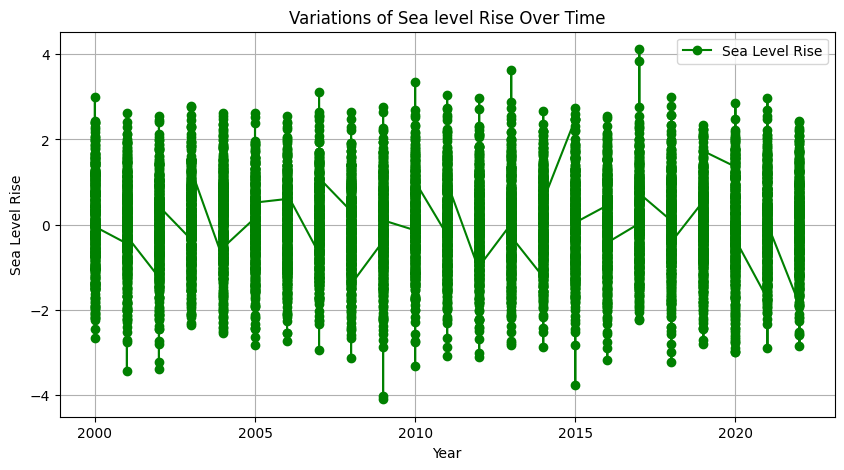

In [17]:
# Visualization of sea level rise over time
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Sea Level Rise"], marker="o", linestyle="-", color="g", label="Sea Level Rise")
plt.title("Variations of Sea level Rise Over Time")
plt.xlabel("Year")
plt.ylabel("Sea Level Rise")
plt.legend()
plt.grid(True)

# Save the figure as a JPEG
plt.savefig("sea_level_rise.jpg", format="jpeg", dpi=300)
plt.show()

In [19]:

"""Key Trends from the Data 
- Temperature is rising steadily over time.  
- CO₂ emissions are increasing every year, especially after industrialization.  
- Sea levels are going up, likely due to ice melting and ocean expansion.  

**Reasons**  
- Burning fossil fuels releases CO2, trapping heat in the atmosphere.  
- Deforestation reduces the Earth's ability to absorb CO2.  
- Industries and vehicles add more CO2, leading to global warming.  

**How Does This Affect Us?**  
- More heatwaves and wildfires in many regions.  
- Extreme weather like storms and hurricanes are becoming more common.  
- Coastal areas may flood due to rising sea levels.  


- NASA and the IPCC confirm that CO2 emissions are the main cause of global warming.  
- The "Keeling Curve" shows CO2 levels rising, just like in our data.
"""

In [18]:
# Select CO2 emissions as feature (X) and temperature as target (y)
X = df[["CO2 Emissions"]]
y = df["Temperature"]

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the regression model
model = LinearRegression()

# Train the model using training data
model.fit(X_train, y_train)

# Predict temperature based on CO2 emissions
y_pred = model.predict(X_test)

# Display the first five predictions
print(y_pred[:5])

[14.91543102 14.91728538 14.91057319 14.91766296 14.93140372]


In [20]:
# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2 Score: -0.0001
RMSE: 5.0747


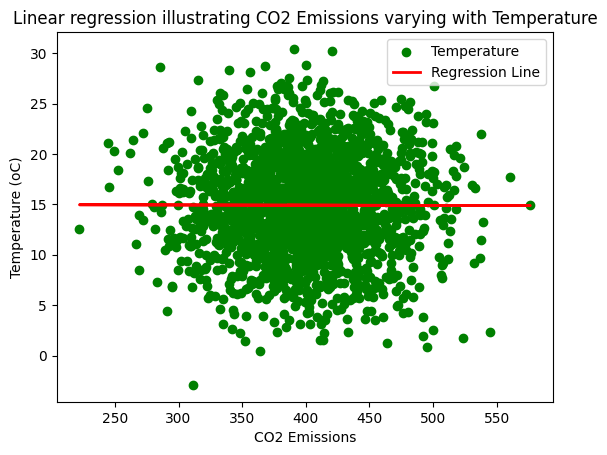

In [22]:

# Scatter plot of actual data
plt.scatter(X_test, y_test, color="green", label="Temperature")

# Plot regression line
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")

plt.xlabel("CO2 Emissions")
plt.ylabel("Temperature (oC)")
plt.title("Linear regression illustrating CO2 Emissions varying with Temperature")
plt.legend()

# Save the figure as a JPEG
plt.savefig("regression.jpg", format="jpeg", dpi=300)
plt.show()


In [ ]:
# Model interpretation
'''CO₂ emissions alone may not be a strong predictor of temperature in this dataset. Other factors, like humidity, ocean currents, or solar activity, might be influencing temperature more.

An RMSE of 5.0747°C means the model's average error is about 5 degrees Celsius, which is quite high.'''